### Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams
from datetime import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [3]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath('./../../'), 'data/TS_data/')
LOCAL_DATA_PATH

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/TS_data/'

In [4]:
df= pd.read_csv(LOCAL_DATA_PATH+'GDPUS.csv')
df.head()

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1


In [5]:
df.head(3)

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3


In [6]:
df.tail(3)

,Year,GDP
60,1989,4739.2
61,1990,4822.3
62,1991,4835.0


In [7]:
date = pd.date_range(start='01/01/1929', end='12/31/1991', freq='Y')

In [8]:
df['Year']=date
df=df.set_index('Year')
df.head()

,GDP
Year,
1929-12-31,821.8
1930-12-31,748.9
1931-12-31,691.3
1932-12-31,599.7
1933-12-31,587.1


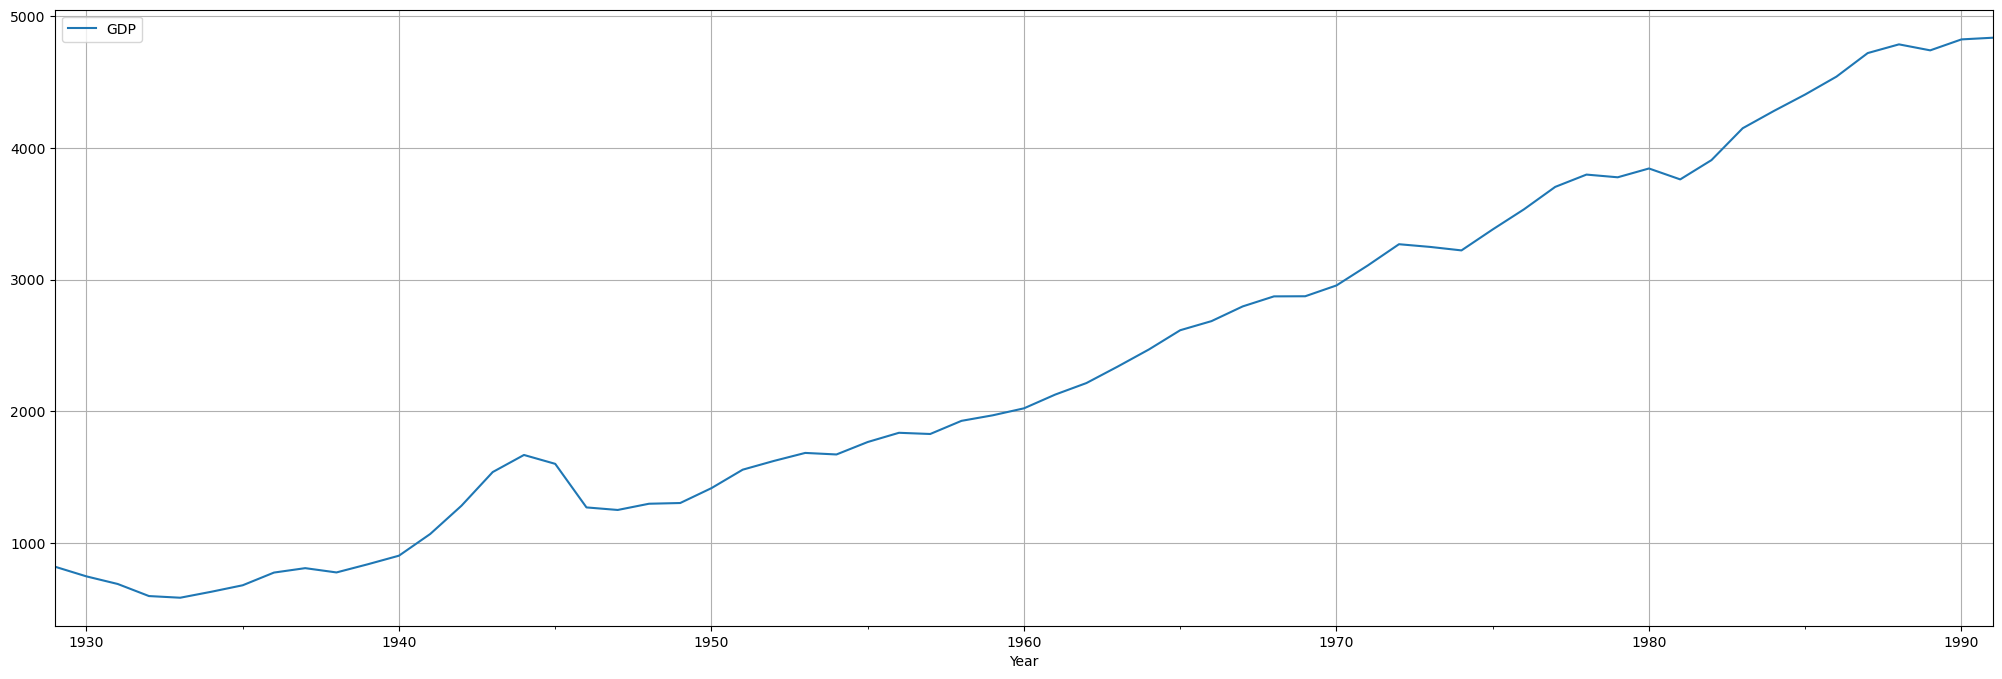

In [9]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

In [10]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [11]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)

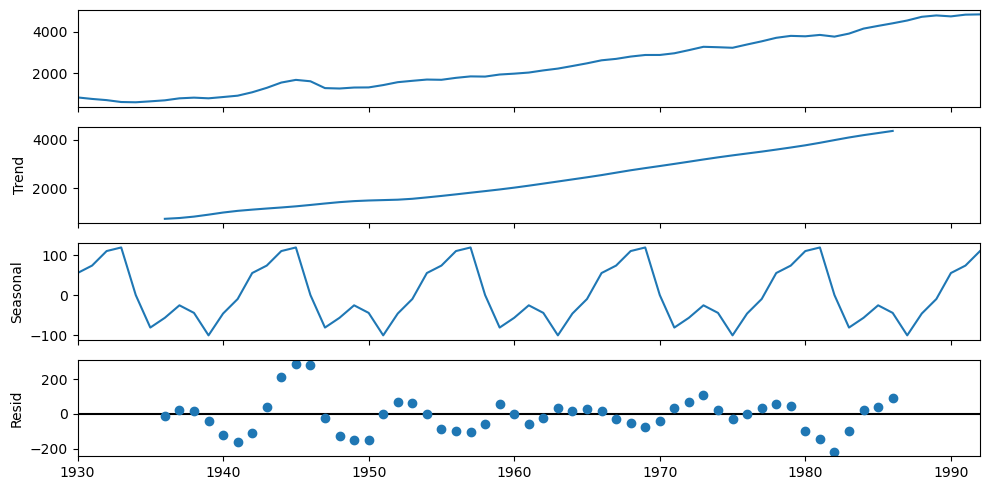

In [13]:
df1_add_decompose.plot()
plt.show()

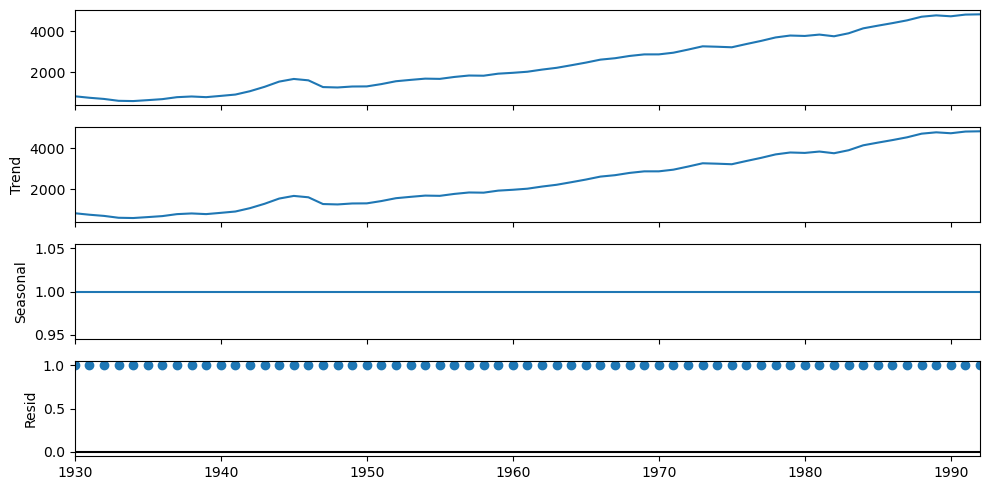

In [14]:
df1_mul_decompose = seasonal_decompose(df, model = 'multiplicative')
df1_mul_decompose.plot()
plt.show()

In [15]:
df1_log = df.copy()

In [16]:
import numpy as np
df1_log.dtypes

GDP    float64
dtype: object

In [17]:
df1_log['GDP'] = np.log(df)

In [18]:
df1_log['GDP'] 

Year
1929-12-31    6.711497
1930-12-31    6.618605
1931-12-31    6.538574
1932-12-31    6.396430
1933-12-31    6.375195
                ...   
1987-12-31    8.459267
1988-12-31    8.473158
1989-12-31    8.463624
1990-12-31    8.481006
1991-12-31    8.483636
Name: GDP, Length: 63, dtype: float64

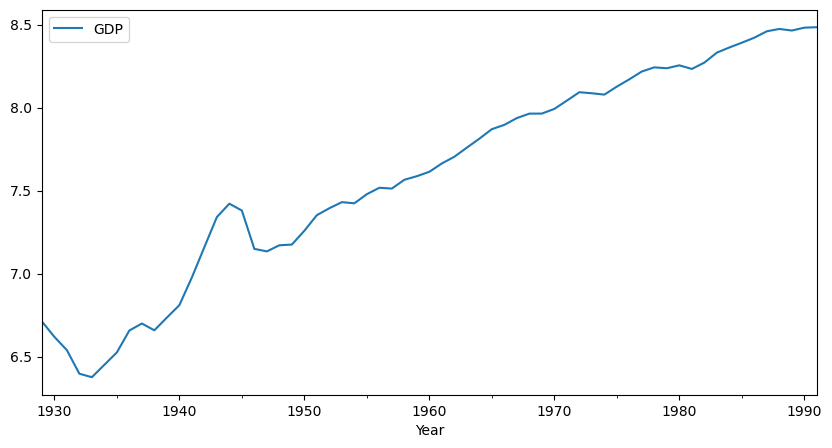

In [19]:
df1_log.plot()
plt.show()

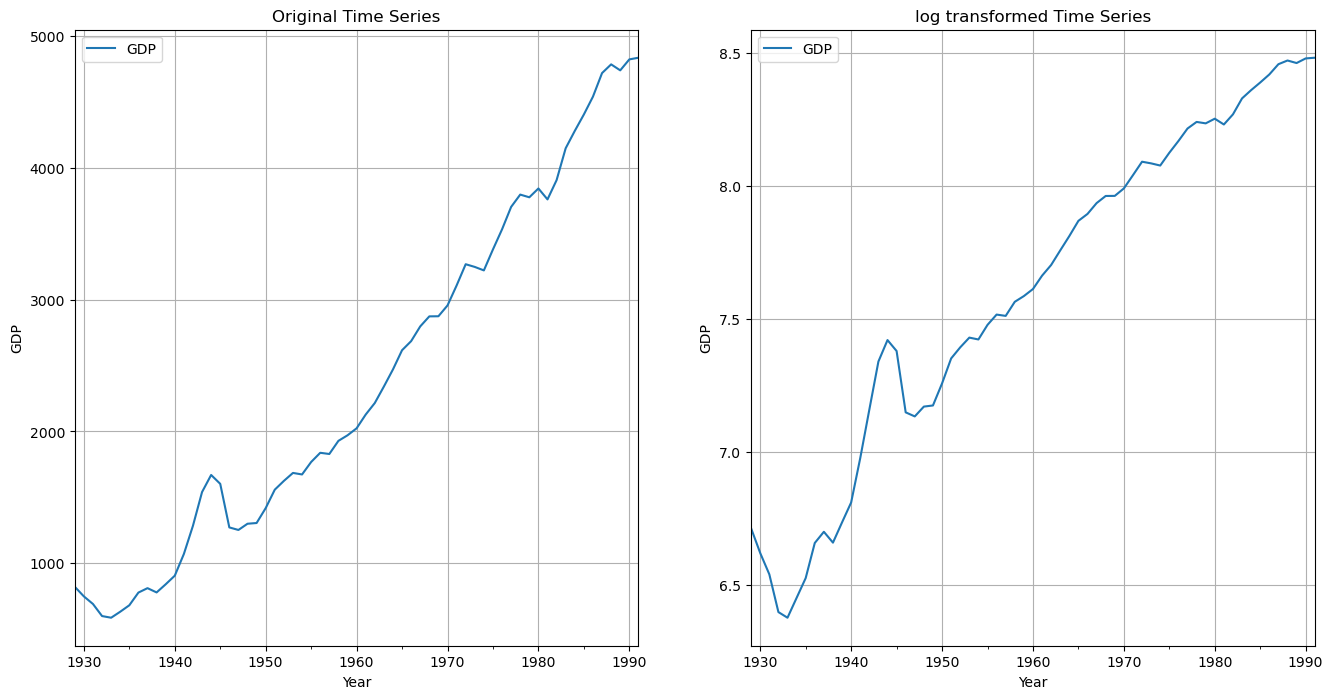

In [20]:
plt.rcParams['figure.figsize'] = (16, 8)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#ax1 = df.plot(ax = ax1)
#ax2 = df1_log.plot(ax=ax2)
df.plot(ax = ax1, title='Original Time Series', ylabel = 'GDP', grid=True)
df1_log.plot(ax=ax2, title='log transformed Time Series', ylabel = 'GDP', grid=True)
plt.show()

In [21]:
df1_add_decompose.trend, df1_mul_decompose.trend

(Year
 1929-12-31   NaN
 1930-12-31   NaN
 1931-12-31   NaN
 1932-12-31   NaN
 1933-12-31   NaN
               ..
 1987-12-31   NaN
 1988-12-31   NaN
 1989-12-31   NaN
 1990-12-31   NaN
 1991-12-31   NaN
 Name: trend, Length: 63, dtype: float64,
 Year
 1929-12-31     821.8
 1930-12-31     748.9
 1931-12-31     691.3
 1932-12-31     599.7
 1933-12-31     587.1
                ...  
 1987-12-31    4718.6
 1988-12-31    4784.6
 1989-12-31    4739.2
 1990-12-31    4822.3
 1991-12-31    4835.0
 Name: trend, Length: 63, dtype: float64)

In [22]:
df1_add_decompose.seasonal, df1_mul_decompose.seasonal

(Year
 1929-12-31     55.783368
 1930-12-31     74.416701
 1931-12-31    110.810451
 1932-12-31    119.805243
 1933-12-31      0.633368
                  ...    
 1987-12-31    -45.665590
 1988-12-31     -9.273924
 1989-12-31     55.783368
 1990-12-31     74.416701
 1991-12-31    110.810451
 Name: seasonal, Length: 63, dtype: float64,
 Year
 1929-12-31    1.0
 1930-12-31    1.0
 1931-12-31    1.0
 1932-12-31    1.0
 1933-12-31    1.0
              ... 
 1987-12-31    1.0
 1988-12-31    1.0
 1989-12-31    1.0
 1990-12-31    1.0
 1991-12-31    1.0
 Name: seasonal, Length: 63, dtype: float64)

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [23]:
train             = df[:55] 
test              = df[55:]

In [24]:
print('Train')
display(train)
print('Test')
display(test)

Train


,GDP
Year,
1929-12-31,821.8
1930-12-31,748.9
1931-12-31,691.3
1932-12-31,599.7
1933-12-31,587.1
1934-12-31,632.6
1935-12-31,681.6
1936-12-31,777.9
1937-12-31,811.4


Test


,GDP
Year,
1984-12-31,4279.8
1985-12-31,4404.5
1986-12-31,4539.9
1987-12-31,4718.6
1988-12-31,4784.6
1989-12-31,4739.2
1990-12-31,4822.3
1991-12-31,4835.0


# Simple Exponential Smoothing

In [25]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [26]:
model_SES_fit1 = model_SES.fit(optimized=True)

#### Predicting forecast using trained models

In [27]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

#### Plotting time searies and forecasts 

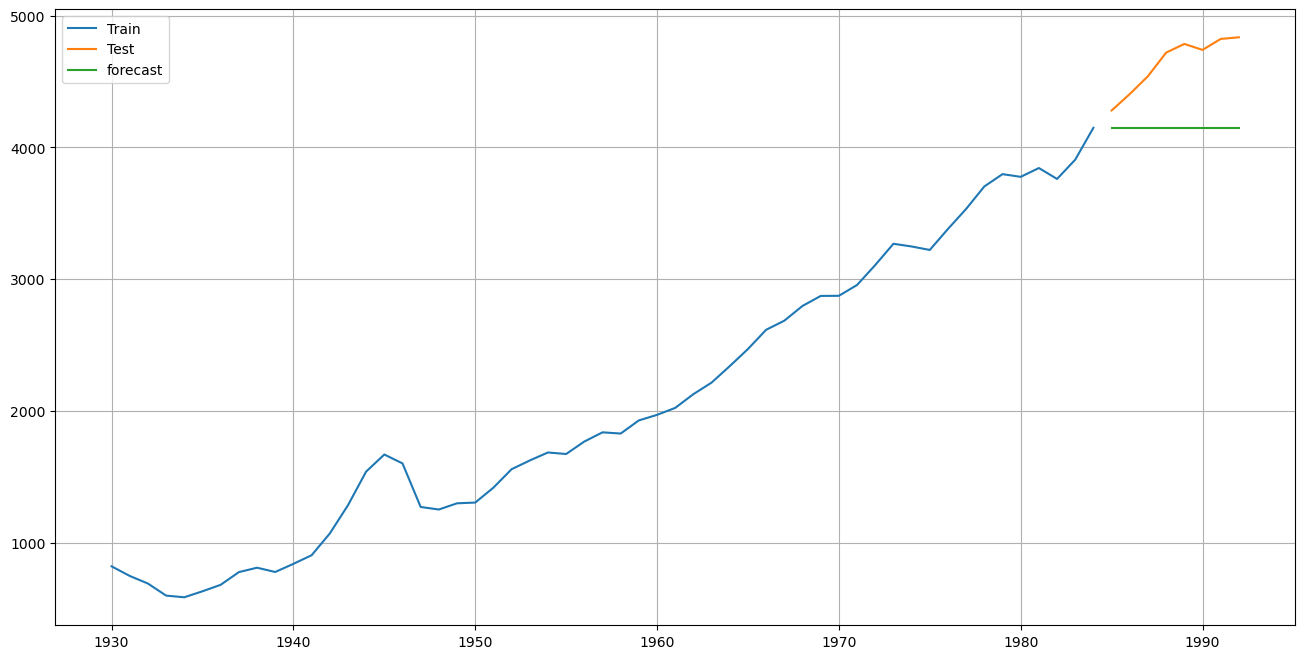

In [28]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

# Double Exponential Smoothing / Holt's linear Method

In [29]:
model_DES = Holt(train,exponential=True, initialization_method='estimated')

#### training the double exponential model

In [30]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [31]:
model_DES_fit1.summary()

Dep. Variable:,GDP,No. Observations:,55
Model:,Holt,SSE,517503.803
Optimized:,True,AIC,511.219
Trend:,Multiplicative,BIC,519.248
Seasonal:,None,AICC,512.969
Seasonal Periods:,None,Date:,"Fri, 26 Apr 2024"
Box-Cox:,False,Time:,20:50:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0236904,beta,True


#### Predicting forecast

In [32]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

#### Lets plot the forecast

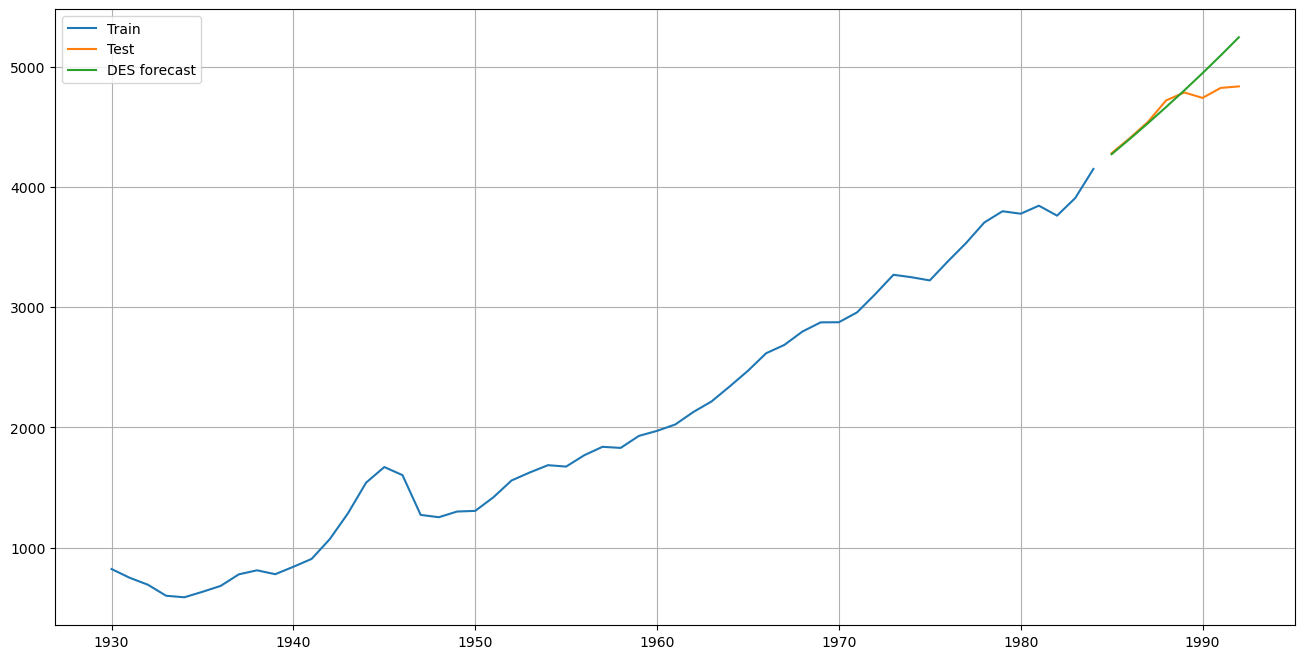

In [33]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

In [34]:
mean_squared_error(test.values,DES_predict1.values,squared=False)

188.89038155127662

#### Defining Mean Absolute Percentage error

In [35]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [36]:
MAPE(test['GDP'],DES_predict1)

2.5629226289249663

# END